# Interpreting Linear Regression

The best way to start understanding the interpretation of linear models is with artificial data, so we know the "expected" numbers

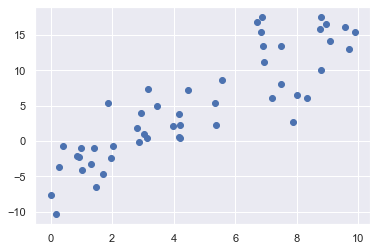

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
sns.set()
rng = np.random.RandomState(1)

x = 10 * rng.rand(50)
y = 2 * x - 5 + (4 * rng.randn(50))
plt.scatter(x, y)

### The normal case

Here x and y have strong, but not perfect correlation.

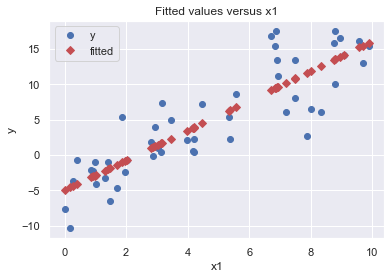

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     151.9
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           1.75e-16
Time:                        21:54:29   Log-Likelihood:                -135.25
No. Observations:                  50   AIC:                             274.5
Df Residuals:                      48   BIC:                             278.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9943      0.954     -5.232      0.000      -6.913      -3.075
x1             2.1088      0.171     12.326      0.000       1.765       2.453
==============================================================================
Omnibus:                        0.058   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.057
Skew:                           0.048   Prob(JB):                        0.972
Kurtosis:                       2.865   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
est = sm.OLS(y, sm.add_constant(x)).fit()
sm.graphics.plot_fit(est, 'x1', vlines=False)
plt.show()
est.summary()

## The Pure Noise Case

Now, let's make $y$ have no relation to $x$ at all. Let's look at the difference in outputs.

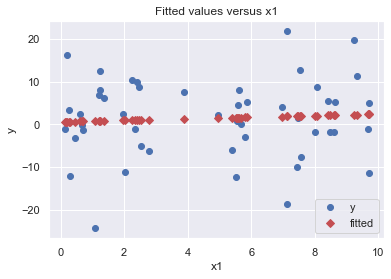

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.1983
Date:                Sun, 03 Jan 2021   Prob (F-statistic):              0.658
Time:                        21:52:38   Log-Likelihood:                -180.77
No. Observations:                  50   AIC:                             365.5
Df Residuals:                      48   BIC:                             369.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5640      2.260      0.250      0.804      -3.980       5.108
x1             0.1781      0.400      0.445      0.658      -0.626       0.982
==============================================================================
Omnibus:                        2.223   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.363
Skew:                          -0.354   Prob(JB):                        0.506
Kurtosis:                       3.391   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
x = 10 * rng.rand(50)
y = 10 * rng.randn(50)

est = sm.OLS(y, sm.add_constant(x)).fit()
sm.graphics.plot_fit(est, 'x1', vlines=False)
plt.show()
est.summary()

Note that $P(x_1 > 0) \geq 0.05$. The p-value that the coefficient of $x$ on $y$ fails to reject the null hypothesis -- thus we don't measure any statistical effect of one on the other.

The **standard error** is very large (0.4 around a 0.18 slope) so the estimate is imprecise here. In the previous case, where there was a relation, the standard errors were 0.18 for a slope of 2 -- leading to a p-value of 0.000 (so the coefficient is statistically significant)

Look at the 25% and 75% intervals, they easily englobe the 0 value.

We can see this by plotting the error bars around the predicted points:

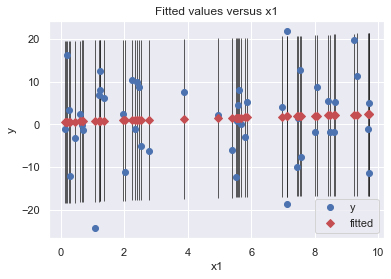

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.1983
Date:                Sun, 03 Jan 2021   Prob (F-statistic):              0.658
Time:                        21:52:38   Log-Likelihood:                -180.77
No. Observations:                  50   AIC:                             365.5
Df Residuals:                      48   BIC:                             369.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5640      2.260      0.250      0.804      -3.980       5.108
x1             0.1781      0.400      0.445      0.658      -0.626       0.982
==============================================================================
Omnibus:                        2.223   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.363
Skew:                          -0.354   Prob(JB):                        0.506
Kurtosis:                       3.391   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
sm.graphics.plot_fit(est, 'x1', vlines=True)
plt.show()
est.summary()

# The pure signal case

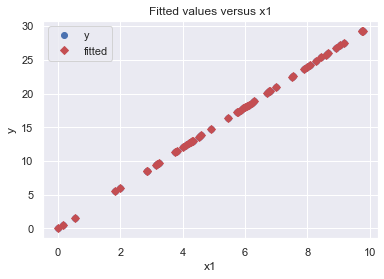

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.855e+32
Date:                Sun, 03 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:52:39   Log-Likelihood:                 1624.5
No. Observations:                  50   AIC:                            -3245.
Df Residuals:                      48   BIC:                            -3241.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.22e-15   6.63e-16      3.349      0.002    8.87e-16    3.55e-15
x1             3.0000   1.07e-16    2.8e+16      0.000       3.000       3.000
==============================================================================
Omnibus:                        0.426   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.808   Jarque-Bera (JB):                0.060
Skew:                           0.053   Prob(JB):                        0.970
Kurtosis:                       3.132   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
x = 10 * rng.rand(50)
y = 3 * x

est = sm.OLS(y, sm.add_constant(x)).fit()
sm.graphics.plot_fit(est, 'x1', vlines=True)
plt.show()
est.summary()

Here the coefficient is exactly the slope, the intercept is 0 and the R^2 is exactly 1. 

All p-values are 0 and standard errors are ~0 as well. The error bars are so small they're invisible.

# It's all about squares

One key diagnostic variable in a regression is the $R^2$ or [R Squared](https://en.wikipedia.org/wiki/Coefficient_of_determination). The formula for it is:

$$R^2 = 1 - \dfrac{SS_{res}}{SS_{tot}}$$

Where $SS_{tot}$ is the total sum of squared difference from the mean, which is the variance:

$$SS_{tot} = var(y) = \sum (y_i - \bar{y})^2$$

And $SS_{res}$ is the sum of prediction errors or *residuals*

$$SS_{res} = \sum (y_i - \hat{y})^2 = \sum e_i^2$$

**R squared is a measure of predicted variation**

This means that a model with $R^2 = 0$ has no more predictive value than just predicting the average on every point.

# Adjusted R^2

The [Adjusted Rsqr](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2) penalizes the $R^2$ for each coefficient you add to the model.

The formula penalizes for lost [degrees of freedom](https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)) and is:

$$\bar{R^2} = 1 - (1 - R^2)\dfrac{n-1}{n-p-1}$$

Where $n$ is the number of observations in the data and $p$ is the number of coefficients that are fitted in the model.

**degrees of freedom**

The [degrees of freedom](https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)) is the number of values in a statistical calculation that are free to vary. This is effectively the remainder between observation points in your dataset and the number of coefficients being estimated.

Later on, we'll talk about **overfitting** in machine learning, which is a related concept.

See what happens when we put too many polynomials to a regression:

- R2 goes down

- Gap between R2 and R2adj grows large

- Model Fit becomes very data-specific

   - Loses extrapolation (not predictive out of sample)

   - Fit has large nonsense variations compared to real world data interpretation

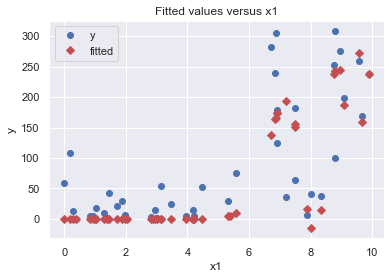

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     17.20
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           5.14e-10
Time:                        21:54:35   Log-Likelihood:                -269.79
No. Observations:                  50   AIC:                             553.6
Df Residuals:                      43   BIC:                             567.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.611e-21   8.02e-22      6.995      0.000    3.99e-21    7.23e-21
x1         -1.465e-20   2.09e-21     -6.993      0.000   -1.89e-20   -1.04e-20
x2         -1.021e-21   1.46e-22     -6.995      0.000   -1.32e-21   -7.27e-22
x3         -6.284e-23   8.98e-24     -6.994      0.000    -8.1e-23   -4.47e-23
x4          3.848e-23    5.5e-24      6.994      0.000    2.74e-23    4.96e-23
x5         -8.371e-24    1.2e-24     -6.995      0.000   -1.08e-23   -5.96e-24
x6          2.605e-24   3.72e-25      6.993      0.000    1.85e-24    3.36e-24
x7          6.375e-23   9.11e-24      6.994      0.000    4.54e-23    8.21e-23
x8          1.802e-31   2.58e-32      6.995      0.000    1.28e-31    2.32e-31
x9          1.155e-30   1.65e-31      6.995      0.000    8.22e-31    1.49e-30
x10         7.336e-30   1.05e-30      6.995      0.000    5.22e-30    9.45e-30
x11         4.611e-29   6.59e-30      6.995      0.000    3.28e-29    5.94e-29
x12         2.864e-28   4.09e-29      6.995      0.000    2.04e-28    3.69e-28
x13         1.755e-27   2.51e-28      6.996      0.000    1.25e-27    2.26e-27
x14         1.059e-26   1.51e-27      6.996      0.000    7.54e-27    1.36e-26
x15         6.277e-26   8.97e-27      6.996      0.000    4.47e-26    8.09e-26
x16         3.645e-25   5.21e-26      6.996      0.000    2.59e-25     4.7e-25
x17         2.067e-24   2.95e-25      6.996      0.000    1.47e-24    2.66e-24
x18          1.14e-23   1.63e-24      6.997      0.000    8.11e-24    1.47e-23
x19          6.08e-23   8.69e-24      6.997      0.000    4.33e-23    7.83e-23
x20         3.118e-22   4.46e-23      6.997      0.000    2.22e-22    4.02e-22
x21         1.525e-21   2.18e-22      6.998      0.000    1.09e-21    1.96e-21
x22         7.027e-21      1e-21      6.999      0.000       5e-21    9.05e-21
x23         3.005e-20   4.29e-21      7.000      0.000    2.14e-20    3.87e-20
x24         1.166e-19   1.66e-20      7.001      0.000     8.3e-20     1.5e-19
x25         3.953e-19   5.65e-20      7.003      0.000    2.81e-19    5.09e-19
x26         1.101e-18   1.57e-19      7.007      0.000    7.84e-19    1.42e-18
x27           2.2e-18   3.14e-19      7.014      0.000    1.57e-18    2.83e-18
x28         2.019e-18   2.86e-19      7.048      0.000    1.44e-18     2.6e-18
x29        -2.005e-18   2.89e-19     -6.926      0.000   -2.59e-18   -1.42e-18
x30         6.206e-19   9.07e-20      6.839      0.000    4.38e-19    8.04e-19
x31        -9.656e-20   1.43e-20     -6.759      0.000   -1.25e-19   -6.78e-20
x32         8.257e-21   1.24e-21      6.683      0.000    5.77e-21    1.07e-20
x33        -3.721e-22   5.63e-23     -6.609      0.000   -4.86e-22   -2.59e-22
x34         6.938e-24   1.06e-24      6.538      0.000     4.8e-24    9.08e-24
==============================================================================
Om

In [15]:
rng = np.random.RandomState(1)

x = 10 * rng.rand(50)
y = np.square(2 * x - 5 + (4 * rng.randn(50)))

x = sm.add_constant(x)
for i in range(2, 35):
    x = np.concatenate([x, (x[:,1] ** i)[:, np.newaxis]], axis=1)

est = sm.OLS(y, x).fit()
sm.graphics.plot_fit(est, 'x1', vlines=False)
plt.show()
est.summary()